In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

cols = ["serial number", "list year", "date recorded", "town", "address", "asseseed value", "sale amount", "sales ratio", 
       "property type", "residential type", "non use code", "assessor remarks", "opm remarks", "location"]

df = pd.read_excel ("DataSet.xlsx", names = cols)

In [2]:
df.rename ({"serial number":"serialNumber"}, axis = 1, inplace = True)
df.rename ({"list year":"listYear"}, axis = 1, inplace = True)
df.rename ({"date recorded":"dateRecorded"}, axis = 1, inplace = True)
df.rename ({"asseseed value":"assedeedValue"}, axis = 1, inplace = True)
df.rename ({"sale amount":"saleAmount"}, axis = 1, inplace = True)
df.rename ({"sales ratio":"salesRatio"}, axis = 1, inplace = True)
df.rename ({"property type":"propertyType"}, axis = 1, inplace = True)
df.rename ({"residential type":"residentialType"}, axis = 1, inplace = True)
df.rename ({"non use code":"nonUseCode"}, axis = 1, inplace = True)
df.rename ({"assessor remarks":"assessorRemarks"}, axis = 1, inplace = True)
df.rename ({"opm remarks":"opmRemarks"}, axis = 1, inplace = True)
df.columns

Index(['serialNumber', 'listYear', 'dateRecorded', 'town', 'address',
       'assedeedValue', 'saleAmount', 'salesRatio', 'propertyType',
       'residentialType', 'nonUseCode', 'assessorRemarks', 'opmRemarks',
       'location'],
      dtype='object')

In [3]:
df.head()
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 200015 entries, (200082.0, 2020.0, '10/21/2020', 'Bristol', '330 EAST RD', ' 101 STEARNS ST', 1, '500080.00', '620000.00', '0.8065', 'Residential', 'Two Family') to (30434.0, 2003.0, datetime.datetime(2004, 6, 2, 0, 0), 'Greenwich', '57 PROSPECT ST', '183470.00', '375000.00', '0.489253333', nan, nan, nan, nan)
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   serialNumber     2895 non-null   object
 1   listYear         57095 non-null  object
 2   dateRecorded     485 non-null    object
 3   town             185 non-null    object
 4   address          65 non-null     object
 5   assedeedValue    30 non-null     object
 6   saleAmount       18 non-null     object
 7   salesRatio       17 non-null     object
 8   propertyType     15 non-null     object
 9   residentialType  14 non-null     object
 10  nonUseCode       14 non-null     object
 11  assessorRemarks

,serialNumber,listYear,dateRecorded,town,address,assedeedValue,saleAmount,salesRatio,propertyType,residentialType,nonUseCode,assessorRemarks,opmRemarks,location
count,2895,57095,485,185,65,30,18,17,15,14,14,13,1,4
unique,1668,48865,419,157,44,18,6,5,3,2,2,1,1,1
top,GOOD SALE PER MLS,0,0,5,6,8,9,10,11,12,13,14 ALL SOLD TOGETHER,POINT (-72.48454 41.85937),POINT (-72.81847 41.454)
freq,229,49,16,14,13,13,13,13,13,13,13,13,1,4


In [4]:
columns_analysis = ['saleAmount', 'propertyType', 'town', 'listYear']
df = df.dropna(subset=columns_analysis)

In [5]:
df['saleAmount'] = pd.to_numeric(df['saleAmount'], errors='coerce')

In [6]:
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 15 entries, (200521.0, 2020.0, datetime.datetime(2021, 10, 6, 0, 0), 'Groton', 203, 207, ' 211 & 215 WINDING HO', '198940.00', '250000.00', '0.7957', 'Vacant Land', nan) to (201179.0, 2020.0, '04/27/2021', 'Griswold', '23 SOUTH MAIN ST UNIT 11', '49420.00', '969000.00', '0.051', 'Residential', 'Condo', '25 - Other', "CONDO'S 1")
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   serialNumber     15 non-null     object 
 1   listYear         15 non-null     object 
 2   dateRecorded     15 non-null     object 
 3   town             15 non-null     object 
 4   address          15 non-null     object 
 5   assedeedValue    15 non-null     object 
 6   saleAmount       14 non-null     float64
 7   salesRatio       14 non-null     object 
 8   propertyType     15 non-null     object 
 9   residentialType  14 non-null     object 
 10  nonUseCode       14 non-null 

In [7]:
df.describe()

,saleAmount
count,14.000000
mean,75.500000
std,248.820216
min,9.000000
25%,9.000000
50%,9.000000
75%,9.000000
max,940.000000


El ingreso anual promedio de las propiedades vendidas es: 75.5


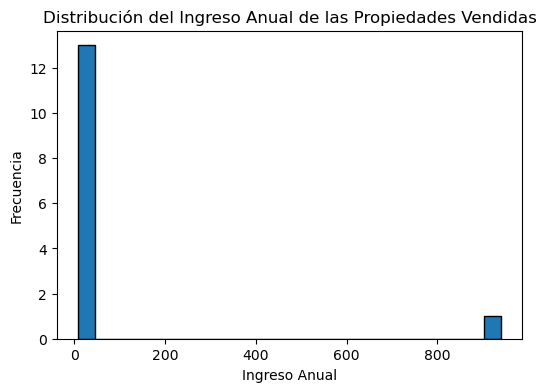

In [12]:
ingreso_anual = df['saleAmount'].mean()
print("El ingreso anual promedio de las propiedades vendidas es:", ingreso_anual)

plt.figure(figsize=(6, 4))
plt.hist(df['saleAmount'], bins=25, edgecolor='k')
plt.xlabel('Ingreso Anual')
plt.ylabel('Frecuencia')
plt.title('Distribución del Ingreso Anual de las Propiedades Vendidas')
plt.show()

In [24]:
df.groupby(by=["address"]).head()

,,,,,,,,,,,,serialNumber,listYear,dateRecorded,town,address,assedeedValue,saleAmount,salesRatio,propertyType,residentialType,nonUseCode,assessorRemarks,opmRemarks,location
200521.0,2020.0,2021-10-06 00:00:00,Groton,203,207,211 & 215 WINDING HO,198940.00,250000.00,0.7957,Vacant Land,NaN,25 - Other,MULT PARCELS- #215 IS VACANT ASSMT=43,050 & 3 TWO-FAM FOUNDATION ONLY ASSMT 50,960,52,990 & 51,940.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
200175.0,2020.0,01/14/2021,Vernon,655 TALCOTTVILLE RD,306910.00,498000.00,0.6162,Residential,Condo,NaN,8 CONDO UNITS (20,55,62,78,105,165,193,NaN,P37,NaN,P64,P138),NaN,POINT (-72.48454 41.85937),NaN
201173.0,2020.0,04/27/2021,Griswold,23 SOUTH MAIN ST UNIT 4,49420.00,969000.00,0.051,Residential,Condo,25 - Other,CONDO'S 1,2,3,4,5,6,8,9.0,10,11.0,12,13,14 ALL SOLD TOGETHER,NaN,NaN
201170.0,2020.0,04/27/2021,Griswold,23 SOUTH MAIN ST UNIT 1,39550.00,969000.00,0.040815273,Residential,Condo,25 - Other,CONDO'S 1,2,3,4,5,6,8,9.0,10,11.0,12,13,14 ALL SOLD TOGETHER,NaN,POINT (-72.81847 41.454)
201180.0,2020.0,04/27/2021,Griswold,23 SOUTH MAIN ST UNIT 12,49420.00,969000.00,0.051,Residential,Condo,25 - Other,CONDO'S 1,2,3,4,5,6,8,9.0,10,11.0,12,13,14 ALL SOLD TOGETHER,NaN,POINT (-72.81847 41.454)
201174.0,2020.0,04/27/2021,Griswold,23 SOUTH MAIN ST UNIT 5,39550.00,969000.00,0.0408,Residential,Condo,25 - Other,CONDO'S 1,2,3,4,5,6,8,9.0,10,11.0,12,13,14 ALL SOLD TOGETHER,NaN,POINT (-72.81847 41.454)
201176.0,2020.0,04/27/2021,Griswold,23 SOUTH MAIN ST UNIT 8,49420.00,969000.00,0.051,Residential,Condo,25 - Other,CONDO'S 1,2,3,4,5,6,8,9.0,10,11.0,12,13,14 ALL SOLD TOGETHER,NaN,NaN
